<a href="https://colab.research.google.com/github/galaxy-kim/Python_note_backup/blob/main/10_jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####이전 셀 실행

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/Ashopping (1).csv",encoding="cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [4]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [5]:
#필요한 열(변수,feature) 뽑아 데이터 만들기
X=df[["총매출액","1회 평균매출액","할인권 사용 횟수"]]
Y=df["평균 구매주기"]

#데이터 분할(train,test)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#model 만들기
model=KNeighborsRegressor()

#교차검증
score=cross_val_score(model,X_train,Y_train,cv=10)
print("CV SCORE : ",score)

CV SCORE :  [0.71641358 0.55975791 0.76634495 0.58696302 0.60491788 0.64888287
 0.73366212 0.53759107 0.74664738 0.79547413]


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#필요한 열(변수,feature) 뽑아 데이터 만들기
X=df[["총매출액","거래기간","방문빈도"]]
Y=df["이탈여부"]

#데이터 분할(train,test)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#모형생성
model=KNeighborsClassifier()

#검증(Stratified K-fold Cross-Validation test)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
scores=cross_val_score(model,X_train,Y_train,cv=skf)
print("교차검증 점수 : ",scores)

교차검증 점수 :  [0.64285714 0.7        0.67857143 0.67142857 0.70714286]


In [7]:
from sklearn.model_selection import GridSearchCV

#필요한 열(변수,feature) 뽑아 데이터 만들기
X=df[["총매출액","거래기간","방문빈도"]]
Y=df["이탈여부"]

#데이터 분할(train,test)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#모형생성
model=KNeighborsClassifier()

#그리드 인자 검색
mylist=list(range(1,50))
k_list=[x for x in mylist if x%2!=0]
parameter_grid={"n_neighbors":k_list}

#그리드 서치
grid_search=GridSearchCV(model,parameter_grid,cv=10)
grid_search.fit(X_train,Y_train)

grid_search.best_params_

{'n_neighbors': 9}

In [8]:
grid_search.cv_results_

{'mean_fit_time': array([0.00279212, 0.00230377, 0.0022367 , 0.00273805, 0.00273769,
        0.00232978, 0.00224609, 0.00260653, 0.00239661, 0.00265064,
        0.0027251 , 0.00264115, 0.0028616 , 0.00251656, 0.00249393,
        0.00238354, 0.00258713, 0.00240035, 0.00225871, 0.00242355,
        0.0028625 , 0.00258892, 0.00219955, 0.0022573 , 0.00236022]),
 'std_fit_time': array([7.98949879e-04, 1.44455141e-04, 1.94374414e-04, 8.55532060e-04,
        7.90578300e-04, 1.74570364e-04, 9.36821688e-05, 6.25353965e-04,
        3.15377740e-04, 6.13739301e-04, 7.25977115e-04, 5.31022661e-04,
        7.35014413e-04, 4.44332485e-04, 8.82810023e-04, 3.85649094e-04,
        7.20021565e-04, 4.74064140e-04, 1.34795887e-04, 2.17697143e-04,
        1.04034292e-03, 5.77725903e-04, 7.50553805e-05, 2.30119404e-04,
        1.60304655e-04]),
 'mean_score_time': array([0.00462778, 0.00396056, 0.00388227, 0.00506225, 0.00517509,
        0.00396149, 0.00414021, 0.00459523, 0.004369  , 0.00539012,
        0.00

In [9]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [10]:
from sklearn.metrics import accuracy_score
be=grid_search.best_estimator_
pred=be.predict(X_test)
accuracy_score(Y_test,pred)

0.6433333333333333

In [11]:
from sklearn.model_selection import GridSearchCV

#필요한 열(변수,feature) 뽑아 데이터 만들기
X=df[["총매출액","거래기간","방문빈도"]]
Y=df["이탈여부"]

#데이터 분할(train,test)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#모형생성
model=KNeighborsClassifier()

#그리드 인자 검색
mylist=list(range(1,50))
k_list=[x for x in mylist if x%2!=0]
parameter_grid={"n_neighbors":k_list}

#그리드 서치
grid_search=GridSearchCV(model,parameter_grid,cv=15)
grid_search.fit(X_train,Y_train)

grid_search.best_params_
grid_search.cv_results_

{'mean_fit_time': array([0.00276949, 0.00644382, 0.0047044 , 0.00499279, 0.00394398,
        0.00522639, 0.00649412, 0.00659316, 0.00406872, 0.00389215,
        0.0043022 , 0.00372092, 0.00539527, 0.00727557, 0.00569382,
        0.00536908, 0.00536656, 0.00416988, 0.00487539, 0.00615743,
        0.00432727, 0.00598771, 0.00908689, 0.00584509, 0.00394894]),
 'std_fit_time': array([0.00058805, 0.00502247, 0.00180039, 0.00359447, 0.00057864,
        0.00347627, 0.00527464, 0.01036709, 0.00156129, 0.00080248,
        0.0033243 , 0.00189219, 0.00309721, 0.0088895 , 0.00300157,
        0.00358042, 0.00295858, 0.00126492, 0.00360262, 0.00486264,
        0.00247898, 0.00342492, 0.0114392 , 0.00423513, 0.00042327]),
 'mean_score_time': array([0.00386815, 0.00901758, 0.00839987, 0.00631239, 0.00869646,
        0.00655004, 0.00884714, 0.00656323, 0.00556653, 0.00655773,
        0.0050628 , 0.00614009, 0.00652059, 0.00700191, 0.00723631,
        0.00655562, 0.00788763, 0.00764456, 0.00682619, 0.00

In [12]:
#cv를 바꾸면 best estimator도 바뀐다다
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=25)

In [13]:
#accuracy score도 달라짐
from sklearn.metrics import accuracy_score
be=grid_search.best_estimator_
pred=be.predict(X_test)
print("예측 정확도 : ",accuracy_score(Y_test,pred))

예측 정확도 :  0.6866666666666666


In [14]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [15]:
from sklearn.feature_selection import SelectKBest,chi2

#데이터 지정(변수)
X=df.drop(["고객ID","이탈여부"],axis=1)
Y=df["이탈여부"]

#데이터 분할
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#일변량 통계기반 변수 선택
selector=SelectKBest()
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["Chi2"]=selector.scores_
score["p-value"]=selector.pvalues_
score["support"]=selector.get_support()
score["attribute"]=X_train.columns
score[score["support"]==True]

,Chi2,p-value,support,attribute
0,11.220487,8.525018e-04,True,총매출액
1,21.391230,4.462997e-06,True,구매금액대
2,40.530259,3.508018e-10,True,방문빈도
3,31.867994,2.401115e-08,True,1회 평균매출액
8,6.784768,9.389630e-03,True,클레임접수여부
11,12.171897,5.156069e-04,True,성별
13,60.680197,2.435210e-14,True,거래기간
14,86.354376,1.882930e-19,True,할인민감여부
16,6.449529,1.131399e-02,True,Frequency
18,40.217271,4.081567e-10,True,평균 구매주기


In [16]:
#모형기반 선택

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0),threshold="median")
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["attribute"]=X_train.columns
score["support"]=selector.get_support()
score[score["support"]==True]

,attribute,support
0,총매출액,True
2,방문빈도,True
3,1회 평균매출액,True
4,할인권 사용 횟수,True
5,총 할인 금액,True
10,거주지역,True
12,고객 나이대,True
13,거래기간,True
14,할인민감여부,True
18,평균 구매주기,True


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [18]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [19]:
#under-sampling

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under,Y_train_under=RandomUnderSampler(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 언더샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("under train data %s"%Counter(Y_train_under))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
under train data Counter({0: 219, 1: 219})


In [20]:
#over-sampling

from imblearn.over_sampling import SMOTE #synthetic minority over-sampling techniques

X_train_over,Y_train_over=SMOTE(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 오버샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("over train data %s"%Counter(Y_train_over))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
over train data Counter({1: 481, 0: 481})


In [21]:
#Y="이탈여부"→"성별" (원데이터가 {0:700,1:300}으로 나왔왔던 건 우연의 일치)
X=df.drop(["고객ID","성별"],axis=1)
Y=df["성별"]

#데이터 분할
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#under-sampling
X_train_under,Y_train_under=RandomUnderSampler(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 언더샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("under train data %s"%Counter(Y_train_under))

#over-sampling
X_train_over,Y_train_over=SMOTE(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 오버샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("over train data %s"%Counter(Y_train_over))

original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
under train data Counter({0: 135, 1: 135})
original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
over train data Counter({0: 565, 1: 565})


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [23]:
import seaborn as sns
import numpy as np

In [24]:
df["평균 구매주기"].describe()

count    1000.000000
mean      266.880824
std       254.077398
min        13.980645
25%       111.957671
50%       191.469697
75%       324.386218
max      1956.000000
Name: 평균 구매주기, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

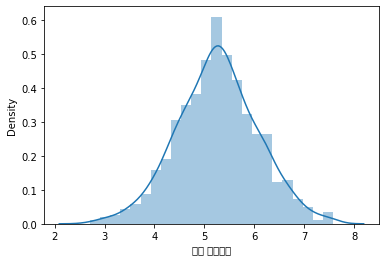

In [25]:
df["평균 구매주기"]=np.log1p(df["평균 구매주기"])
sns.distplot(df["평균 구매주기"])

In [26]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder #범주형 변수를 정수로 인식하는 것을 방지하기 위해 사용

num=['총매출액','1회 평균매출액','할인권 사용 횟수','총 할인 금액','구매카테고리수','Frequency','Monetary']
cg=['구매금액대','고객등급','구매유형','클레임접수여부','거주지역','성별','고객 나이대']

X=df[df.이탈여부==0][num+cg]
Y=df[df.이탈여부==0]["평균 구매주기"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#표준화, 원핫인코딩
ct=ColumnTransformer([("scling",StandardScaler(),num),("onehot",OneHotEncoder(sparse=False),cg)])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

print(X_train[0])

[-0.42215576 -0.59782402  0.72324173  0.52150413  1.67181667 -0.24075719
  0.52402175  1.          0.          0.          1.          0.
  0.          0.          1.          0.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          0.        ]


In [28]:
from sklearn.linear_model import LinearRegression #선형모델
from sklearn.metrics import mean_squared_error #MSE
from math import sqrt #루트

lr=LinearRegression().fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2:{:.3f}".format(lr.score(X_train,Y_train))) #train set_R2
print("test R2:{:.3f}".format(lr.score(X_test,Y_test)))

rmse=sqrt(mean_squared_error(Y_test,Y_pred)) #RMSE
print("RMSE : {:.3f}".format(rmse)) #오차의 합 → 0에 가까울수록 좋다

predict value
 [6.0302701  5.41215677 5.42420867 6.43899079 4.93590919 5.85532849
 4.56394358 3.8038955  5.22290102 5.61752221 5.66755858 3.44015256
 4.32828323 5.41149193 5.83496713 5.04649847 5.12441095 5.61717937
 5.28594149 5.43582927 5.45116422 5.26304722 5.70801146 5.03246422
 4.70523751 5.39010832 5.59724863 4.08965942 4.40771408 5.45203619
 5.39920771 5.65530022 5.27711883 5.7898368  5.34802942 5.55984513
 5.18690689 5.57605304 5.47013415 6.61038086 5.42457581 4.43007687
 4.68874494 4.29082123 4.77392453 5.94844185 4.93573451 5.44179832
 5.29885396 5.79849569 5.44895057 6.13893195 4.70853914 4.72136082
 5.26288015 5.29559649 4.9944117  5.70877743 4.22588554 5.06871067
 5.13133955 4.83694564 4.444105   5.55643915 4.70940657 5.48285624
 5.44463304 4.79091017 5.55952311 3.24002924 5.61109691 5.0678168
 5.25923693 4.69626943 3.98374392 5.84571399 5.66972277 5.3203395
 4.21100319 4.96752541 4.81038608 5.46601131 5.26382683 4.61218179
 5.48213481 5.17219235 4.98828846 5.52966787 4.19

In [29]:
#cg=['구매금액대','고객등급','구매유형','클레임접수여부','거주지역','성별','고객 나이대']

#Y=β0_5.204+(-0.156)총매출액+(0.388)1회평균매출액+...

print("절편",np.round(lr.intercept_,3)) #x가 모두 0일 때(y절편,상수항)
print("가중치(beta)",np.round(lr.coef_,3))

절편 5.204
가중치(beta) [-0.156  0.388 -0.019 -0.01   0.035 -0.29   0.015  0.292 -0.001 -0.29
  0.014 -0.014  0.055  0.036  0.008 -0.099 -0.08   0.08   0.427 -0.082
 -0.06  -0.194 -0.021 -0.078  0.008 -0.055  0.055 -0.427  0.01   0.07
  0.043  0.048  0.257]


In [30]:
#릿지 회귀(선형회귀에서 모형만 바꾼 셈)

from sklearn.linear_model import Ridge

lr_ridge=Ridge(random_state=0).fit(X_train,Y_train)
Y_pred=lr_ridge.predict(X_test)

print("예측값(Y predict value)\n",Y_pred)

예측값(Y predict value)
 [6.03000797 5.41671746 5.42932123 6.44127922 4.93860553 5.85932374
 4.56839084 3.81054588 5.22477967 5.61889847 5.66813628 3.42981349
 4.33248596 5.41101642 5.83804147 5.04471767 5.1211324  5.61206657
 5.28801914 5.32488795 5.45169079 5.25880606 5.71346032 5.02859175
 4.70951147 5.38878901 5.60027856 4.09721037 4.40744067 5.45098959
 5.39702921 5.64784758 5.27252093 5.79008128 5.35467632 5.56063965
 5.19607603 5.57536879 5.46592343 6.61557262 5.42387534 4.43825559
 4.69193156 4.30121093 4.7731486  5.950302   4.94125475 5.44030949
 5.2948706  5.79698793 5.44723488 6.13538058 4.70865764 4.72464693
 5.25715635 5.29808444 4.9962477  5.70904828 4.24165264 5.06579461
 5.1252699  4.83996783 4.44518243 5.55905844 4.70841625 5.47720406
 5.44152413 4.79120395 5.56974829 3.25280314 5.6106784  5.06803014
 5.25956393 4.70791967 3.98838094 5.84965084 5.67331254 5.31944294
 4.21646513 4.98002289 4.81229781 5.46333154 5.27177929 4.610552
 5.48261262 5.17186083 4.9841382  5.528922

In [31]:
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("R2 : {:.3f}".format(lr_ridge.score(X_train,Y_train)))
print("RMSE : {:.3f}".format(rmse))

#선형회귀 계산보다 rmse가 0.002 떨어짐

R2 : 0.726
RMSE : 0.403


In [32]:
#라쏘 회귀

from sklearn.linear_model import Lasso

lr_lasso=Lasso(random_state=0,alpha=0.01,max_iter=1000).fit(X_train,Y_train)
Y_pred=lr_lasso.predict(X_test)

print("예측값(Y predict value)\n",Y_pred)

예측값(Y predict value)
 [5.85999035 5.43036643 5.44663007 6.48906612 4.97641413 5.69822258
 4.5716117  3.88906492 5.27984535 5.54858587 5.67709958 3.30742434
 4.45272397 5.42149034 5.87903236 5.00187799 5.12055037 5.56949787
 5.33279402 5.0264179  5.52733519 5.1867408  5.665303   5.0119166
 4.70132881 5.44864394 5.62488274 4.16327321 4.38211259 5.4308754
 5.37511549 5.67040693 5.19104603 5.79672221 5.47877539 5.4547485
 5.25369206 5.54714363 5.42273349 6.6026743  5.44052754 4.61359453
 4.74827815 4.47000201 4.78926599 5.82570411 4.93589832 5.42347938
 5.19064772 5.71009563 5.38598782 5.87895508 4.47556196 4.77561637
 5.23514088 5.36821002 4.94726191 5.74052715 4.48801399 4.99109917
 4.96578984 4.92437103 4.49896869 5.51596171 4.70911385 5.37807152
 5.38059893 4.70777152 5.63186935 3.33411699 5.63024419 5.02637709
 5.23878352 4.85617924 4.07737633 5.82495727 5.67069263 5.22957699
 4.31245514 5.15236296 4.79517679 5.3733623  5.32829571 4.50502391
 5.54652945 5.21846617 5.01779632 5.5396285

In [33]:
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train,Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교 : 선형, 릿지보다 더 낮은 R2값 나옴 / RMSE 값 더 작음 → 더 적은 error : 모형의 예측력이 더 좋다
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train,Y_train)))
print("lr R2 : {:.3f}".format(lr.score(X_train,Y_train)))

lasso R2 : 0.709
RMSE : 0.391
ridge R2 : 0.726
lr R2 : 0.726


In [34]:
#엘라스틱넷

from sklearn.linear_model import ElasticNet

lr_ela=ElasticNet(alpha=0.01).fit(X_train,Y_train)
Y_pred=lr_ela.predict(X_test)

print("예측값(Y predict value)\n",Y_pred)

예측값(Y predict value)
 [5.9405265  5.43949734 5.45645319 6.46077287 4.95641647 5.75737516
 4.58077628 3.8664991  5.2544911  5.56797779 5.69465169 3.35014751
 4.41740921 5.41472514 5.87198794 5.01984866 5.1079496  5.56938294
 5.33424602 5.01150019 5.50236848 5.21289944 5.70405138 5.00509779
 4.73712733 5.43318095 5.63394533 4.16143035 4.40905906 5.45448006
 5.38029119 5.65239382 5.22517748 5.78702872 5.43971899 5.50091954
 5.24686551 5.54584606 5.45012419 6.63427603 5.44729928 4.5642916
 4.7153638  4.40426435 4.79804451 5.87250388 4.95774286 5.42138422
 5.21745366 5.74415372 5.42050245 5.98513427 4.55881782 4.75746308
 5.24959713 5.33108418 4.9783863  5.741972   4.39245511 5.01488932
 5.01745308 4.88230883 4.47336366 5.52395419 4.69688542 5.41272695
 5.3969981  4.7412395  5.62539593 3.29112611 5.63602937 5.02901435
 5.25500609 4.80177521 4.03300414 5.85055833 5.6889433  5.2796506
 4.26043501 5.08768705 4.80884726 5.39430314 5.33776004 4.52387454
 5.51513909 5.19015221 4.99602694 5.549680

In [35]:
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("ela R2 : {:.3f}".format(lr_ela.score(X_train,Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train,Y_train)))
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train,Y_train)))
print("lr R2 : {:.3f}".format(lr.score(X_train,Y_train)))

ela R2 : 0.717
RMSE : 0.394
lasso R2 : 0.709
ridge R2 : 0.726
lr R2 : 0.726


In [36]:
#데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [37]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,5.260784
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,0.812845
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,2.706759
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,4.727013
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,5.259938
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,5.785012
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,7.579168


In [38]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [39]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [40]:
X=df[['총매출액','거래기간','방문빈도']]
Y=df['이탈여부']

#데이터 분할
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#scaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)

[[ 0.69336175  0.22690456  0.03475125]
 [-0.225208   -0.02778804 -0.17540748]
 [-0.52055725  0.61729402  0.98046554]
 ...
 [-0.60960507  0.55779616 -0.01778844]
 [-0.02842033 -0.64468689 -0.22794717]
 [-0.30394592  0.83127755 -0.70080431]]


In [41]:
#oversampling
smote=SMOTE(random_state=0)
X_train_over,Y_train_over=smote.fit_resample(X_train,Y_train)

In [42]:
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression(C=1,random_state=0)
##C의 강도에 따라 변수의 가중치가 조절됨(너무 높으면 최적화 안 됨/작으면 변수의 베타가 증폭됨 → 보통 1 사용)

logit.fit(X_train_over,Y_train_over)
Y_pred=logit.predict(X_test)

#Y_pred
print("accuracy(R2) : {:.3f}".format(logit.score(X_train_over,Y_train_over)))
##accuracy, f1-score로 평가

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))
print(logit.intercept_) #절편
print(logit.coef_) #각 변수에 대한 계수

accuracy(R2) : 0.710
              precision    recall  f1-score   support

           0       0.91      0.66      0.77       219
           1       0.47      0.81      0.60        81

    accuracy                           0.70       300
   macro avg       0.69      0.74      0.68       300
weighted avg       0.79      0.70      0.72       300

[-0.10121145]
[[-0.10720418 -0.58431042 -0.47899592]]


In [43]:
#다항 로지스틱 회귀분석
##종속변수가 둘(0,1) 이상의 클래스로 나뉠 때 사용

X=df[["방문빈도","총 할인 금액","거래기간","할인민감여부"]]
Y=df["구매금액대"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#Column transformer
ct=ColumnTransformer([("scaling",StandardScaler(),["방문빈도","총 할인 금액","거래기간"]),
                      ("onehot",OneHotEncoder(sparse=False),["할인민감여부"])])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

##샘플링 생략

#model 생성
multilogit=LogisticRegression(random_state=0,C=0.1,solver="newton-cg",multi_class="multinomial")
##solver(규제적용 알고리즘) : "lbfgs","liblinear"(선형),"sag","saga"(로지스틱)
###어떤 가중치를 사용해 이 문제를 해결할 것인가
multilogit.fit(X_train,Y_train)
Y_pred=multilogit.predict(X_test)

#성능
print("R2 : {:.3f}".format(multilogit.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))

R2 : 0.606
              precision    recall  f1-score   support

           0       0.61      0.89      0.72       154
           1       0.40      0.12      0.19        82
           2       0.71      0.55      0.62        64

    accuracy                           0.61       300
   macro avg       0.57      0.52      0.51       300
weighted avg       0.57      0.61      0.55       300



In [44]:
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,5.011544
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,4.410883
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,7.505492
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,6.001690
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,5.896604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,4.884748
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,6.648553
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,5.875579
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,4.938321


In [45]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [46]:
#classification (분류모델)

X=df[['총매출액','1회 평균매출액','방문빈도', '거래기간', '평균 구매주기']]
Y=df["이탈여부"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler=StandardScaler().fit(X_train,Y_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)

X_train,Y_train=SMOTE(random_state=0).fit_resample(X_train,Y_train)

from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=9,metric="euclidean")
#유클리디언 거리(루트 x2+y2)
##맨하탄 거리(x,y 계단식)

knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
print("accuracy : {:.3f}".format(knn_model.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))
##accuracy, f1-score(class별 f1-score의 평균) 확인하면 됨

accuracy : 0.844
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       219
           1       0.56      0.81      0.67        81

    accuracy                           0.78       300
   macro avg       0.74      0.79      0.75       300
weighted avg       0.82      0.78      0.79       300



In [47]:
#numeric value(Y)
import numpy as np

X=df[df.이탈여부==0][["총매출액","1회 평균매출액","총 할인 금액","구매카테고리수","Frequency"]]
Y=df[df.이탈여부==0]["평균 구매주기"]
Y=np.log1p(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler=StandardScaler().fit(X_train,Y_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=9,p=2)
##p:int,default=2
##Power parameter for the Minkowski metric, When p=1,this is equivalent to using mantattan_distance(l1),
##and euclidean_distance(l2) for p=2. For arbitrary p,minkowski_distance

knn_reg.fit(X_train,Y_train)
Y_pred=knn_reg.predict(X_test)
print("accuracy : {:.3f}".format(knn_reg.score(X_train,Y_train))) #train accuracy(regression → 예측값에 대해선 발생하지 않음)
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE : {:.3f}".format(rmse))

accuracy : 0.759
RMSE : 0.063


#의사결정나무
###DT(decision tree)

In [48]:
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,5.011544
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,4.410883
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,7.505492
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,6.001690
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,5.896604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,4.884748
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,6.648553
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,5.875579
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,4.938321


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [50]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,5.260784
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,0.812845
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,2.706759
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,4.727013
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,5.259938
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,5.785012
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,7.579168


In [51]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [52]:
X=df[['총매출액', '구매금액대','할인권 사용 횟수','총 할인 금액','구매유형', '구매카테고리수', '성별', '거주지역']]
Y=df["이탈여부"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

smote=SMOTE(random_state=0)
X_train,Y_train=smote.fit_resample(X_train,Y_train)

from sklearn.tree import DecisionTreeClassifier

DT_model=DecisionTreeClassifier(random_state=0,max_depth=3) #깊이=층
DT_model.fit(X_train,Y_train)
Y_pred=DT_model.predict(X_test)
print("accurary : {:.3f}".format(DT_model.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))

accurary : 0.626
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       219
           1       0.28      0.28      0.28        81

    accuracy                           0.61       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.61      0.61      0.61       300



In [53]:
#feature importance (변수 중요도) : 변수의 영향 확인(가중치β와 유사)
feature_name=X.columns
feature_importance=DT_model.feature_importances_
sorted(zip(feature_importance,feature_name),reverse=True)

[(0.7493404125777997, '총매출액'),
 (0.1630541216629677, '거주지역'),
 (0.08760546575923255, '구매카테고리수'),
 (0.0, '할인권 사용 횟수'),
 (0.0, '총 할인 금액'),
 (0.0, '성별'),
 (0.0, '구매유형'),
 (0.0, '구매금액대')]

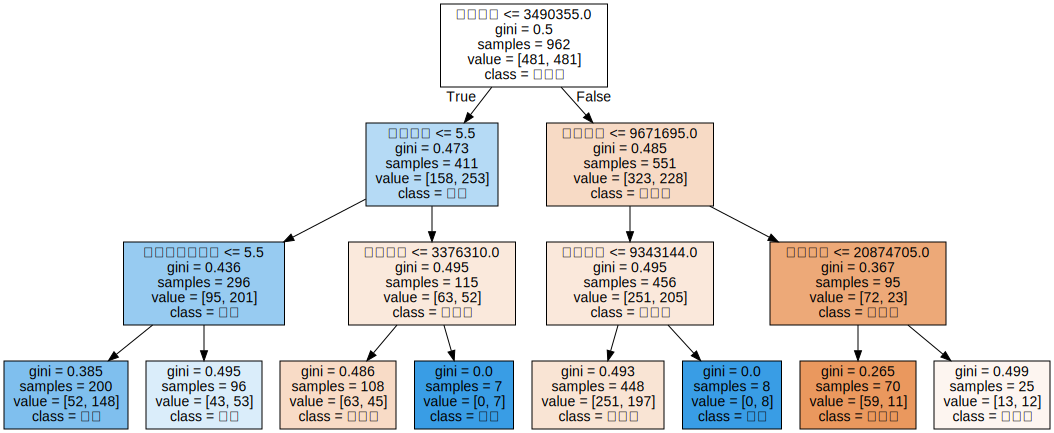

In [54]:
#시각화
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model,out_file="tree.dot",class_names=["비이탈","이탈"],
              feature_names=feature_name,impurity=True,filled=True)

#파일열기
with open("tree.dot",encoding="utf-8") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [55]:
#numeric value(Y)
X=df[df.이탈여부==0][['총매출액', '구매금액대','할인권 사용 횟수','총 할인 금액','구매유형', '구매카테고리수', '성별', '거주지역']]
Y=df[df.이탈여부==0]["평균 구매주기"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeRegressor

DT_model_reg=DecisionTreeRegressor(random_state=0,max_depth=5)
DT_model_reg.fit(X_train,Y_train)
Y_pred=DT_model_reg.predict(X_test)
print("accurary : {:.3f}".format(DT_model_reg.score(X_train,Y_train)))
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse : {:.3f}".format(rmse))

accurary : 0.558
rmse : 0.625


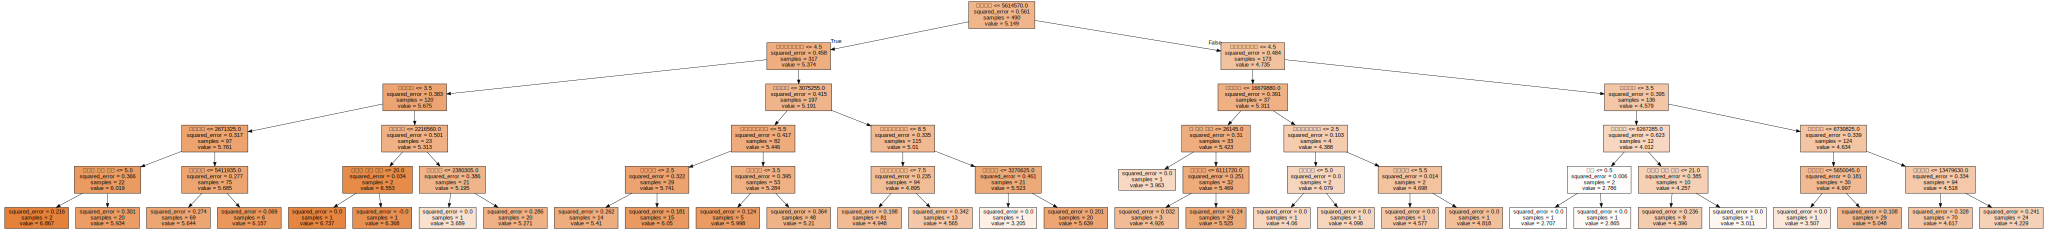

In [56]:
#시각화
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model_reg,out_file="tree.dot",class_names=["비이탈","이탈"],
              feature_names=feature_name,impurity=True,filled=True)

#파일열기
with open("tree.dot",encoding="utf-8") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#SVM
###Support Vector Machine

In [57]:
X=df[['총매출액', '구매금액대','할인권 사용 횟수','총 할인 금액','구매유형', '구매카테고리수', '성별', '거주지역']]
Y=df["이탈여부"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

smote=SMOTE(random_state=0)
X_train,Y_train=smote.fit_resample(X_train,Y_train)

from sklearn.svm import SVC

SVC_model=SVC(C=1000,gamma=10,random_state=0)
SVC_model.fit(X_train,Y_train)
Y_pred=SVC_model.predict(X_test)
print("accurary : {:.3f}".format(SVC_model.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))

accurary : 1.000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.27      1.00      0.43        81

    accuracy                           0.27       300
   macro avg       0.14      0.50      0.21       300
weighted avg       0.07      0.27      0.11       300



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
X=df[['총매출액', '구매금액대','할인권 사용 횟수']]
Y=df["할인민감여부"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

smote=SMOTE(random_state=0)
X_train,Y_train=smote.fit_resample(X_train,Y_train)

from sklearn.svm import SVC

SVC_model=SVC(C=1,random_state=0)
SVC_model.fit(X_train,Y_train)
Y_pred=SVC_model.predict(X_test)
print("accurary : {:.3f}".format(SVC_model.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))


accurary : 0.669
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       177
           1       0.84      0.42      0.56       123

    accuracy                           0.73       300
   macro avg       0.77      0.68      0.68       300
weighted avg       0.76      0.73      0.71       300



In [72]:
X=df[['구매금액대','할인권 사용 횟수']]
Y=np.log1p(df["총매출액"]) #자연로그 : 정규분포화

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler=StandardScaler().fit(X_train,Y_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)

from sklearn.svm import SVR

SVR_model=SVR(C=1,kernel="linear",epsilon=0.1)
SVR_model.fit(X_train,Y_train)
Y_pred=SVR_model.predict(X_test)
print("accurary : {:.3f}".format(SVR_model.score(X_train,Y_train)))
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE : {:.3f}".format(rmse))
print(SVR_model.coef_)

accurary : 0.804
RMSE : 0.286
[[0.5015258  0.00587065]]


#나이브 베이즈
###Naive Bayes

In [68]:
X=df[['총매출액', '구매금액대','할인권 사용 횟수']]
Y=df["할인민감여부"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

smote=SMOTE(random_state=0)
X_train,Y_train=smote.fit_resample(X_train,Y_train)

from sklearn.naive_bayes import GaussianNB 

NB_model=GaussianNB(var_smoothing=0)
NB_model.fit(X_train,Y_train)
Y_pred=NB_model.predict(X_test)
print("accurary : {:.3f}".format(NB_model.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))

accurary : 0.661
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       177
           1       0.79      0.42      0.55       123

    accuracy                           0.72       300
   macro avg       0.74      0.67      0.67       300
weighted avg       0.73      0.72      0.69       300



In [73]:
#numeric value(Y)
X=df[df.이탈여부==0][['총매출액', '구매금액대','할인권 사용 횟수','총 할인 금액','구매유형', '구매카테고리수', '성별', '거주지역']]
Y=np.log1p(df[df.이탈여부==0]["평균 구매주기"])

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

from sklearn.linear_model import BayesianRidge

NB_model_reg=BayesianRidge(alpha_1=0.001,lambda_1=0.001)
NB_model_reg.fit(X_train,Y_train)
Y_pred=NB_model_reg.predict(X_test)
print("accurary : {:.3f}".format(NB_model_reg.score(X_train,Y_train)))
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse : {:.3f}".format(rmse))
print(NB_model_reg.coef_) #regression → coef

accurary : 0.284
rmse : 0.099
[-5.53099958e-09 -2.22146741e-02  5.83806583e-04 -5.13836053e-08
 -5.44323948e-03 -1.72715338e-02  1.04643592e-02  1.78568992e-03]


##모형 성능비교

In [74]:
#분류모형
X1=df[['총매출액', '구매금액대','할인권 사용 횟수','총 할인 금액','구매유형', '구매카테고리수', '성별', '거주지역']]
Y1=df["이탈여부"]

In [75]:
X1

,총매출액,구매금액대,할인권 사용 횟수,총 할인 금액,구매유형,구매카테고리수,성별,거주지역
0,4963160,1,1,5445,3,7,1,6
1,2271520,0,22,350995,1,5,0,4
2,2484250,0,6,186045,2,4,0,6
3,2778850,0,1,5195,4,4,0,5
4,4437610,1,9,246350,4,6,0,6
...,...,...,...,...,...,...,...,...
995,12731560,2,3,44445,3,8,0,6
996,3419010,0,6,186545,2,9,0,6
997,4612100,1,8,260700,1,1,1,4
998,5165360,1,20,347700,3,7,1,5


In [76]:
Y1

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: 이탈여부, Length: 1000, dtype: int64

In [93]:
X1.columns

Index(['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액', '구매유형', '구매카테고리수', '성별',
       '거주지역'],
      dtype='object')

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3,random_state=0)

#Column transformer
ct=ColumnTransformer([("scaling",StandardScaler(),['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액']),
                      ("onehot",OneHotEncoder(sparse=False),['구매유형', '구매카테고리수', '성별', '거주지역'])])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)


In [86]:
logit_model=LogisticRegression(C=1,random_state=0)
knn_model=KNeighborsClassifier(n_neighbors=9)
dt_model=DecisionTreeClassifier(random_state=0,max_depth=3)

In [87]:
logit_model.fit(X_train,Y_train)
knn_model.fit(X_train,Y_train)
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [88]:
logit_Y_pred=logit_model.predict(X_test)
knn_Y_pred=knn_model.predict(X_test)
dt_Y_pred=dt_model.predict(X_test)

In [90]:
print("logit score : {:.3f}".format(logit_model.score(X_train,Y_train))) #결정계수
print("knn score : {:.3f}".format(knn_model.score(X_train,Y_train))) #accuracy
print("dt score : {:.3f}".format(dt_model.score(X_train,Y_train))) #accuracy
## dt score가 제일 높다 (train 데이터를 설명하는 정도)

logit score : 0.697
knn score : 0.704
dt score : 0.713


In [92]:
print(classification_report(Y_test,logit_Y_pred))
print(classification_report(Y_test,knn_Y_pred))
print(classification_report(Y_test,dt_Y_pred))
## accuracy / f1-score 큰 차이 없음 → dt 혹은 logit 선택

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       219
           1       0.65      0.16      0.26        81

    accuracy                           0.75       300
   macro avg       0.70      0.56      0.55       300
weighted avg       0.73      0.75      0.69       300

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       219
           1       0.32      0.17      0.22        81

    accuracy                           0.68       300
   macro avg       0.53      0.52      0.51       300
weighted avg       0.62      0.68      0.64       300

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       219
           1       0.75      0.04      0.07        81

    accuracy                           0.74       300
   macro avg       0.74      0.52      0.46       300
weighted avg       0.74      0.74      0.64       300



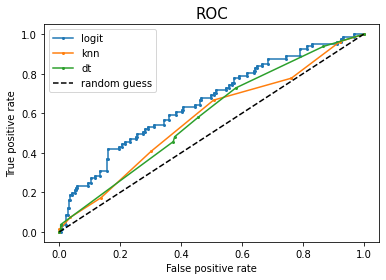

In [110]:
#plot

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

fpr1,tpr1,threshold=roc_curve(Y_test,logit_model.decision_function(X_test))
fpr2,tpr2,threshold=roc_curve(Y_test,knn_model.predict_proba(X_test)[:,1])
fpr3,tpr3,threshold=roc_curve(Y_test,dt_model.predict_proba(X_test)[:,1])

#ROC
plt.plot(fpr1,tpr1,'o-',ms=2,label="logit")
plt.plot(fpr2,tpr2,'o-',ms=2,label="knn")
plt.plot(fpr3,tpr3,'o-',ms=2,label="dt")
plt.plot([0,1],[0,1],"k--",label="random guess")

plt.legend()
plt.xlabel("False positive rate",fontsize=10)
plt.ylabel("True positive rate",fontsize=10)
plt.title("ROC",fontsize=15)
plt.show()

In [105]:
logit_model_auc=roc_auc_score(Y_test,logit_model.decision_function(X_test))
knn_model_auc=roc_auc_score(Y_test,knn_model.predict_proba(X_test)[:,1])
dt_model_auc=roc_auc_score(Y_test,dt_model.predict_proba(X_test)[:,1])
##전체 면적이 1이라 생각 → 65%,57%,58% 정도씩 맞는다

In [112]:
print("logit AUC score : {:.3f}".format(logit_model_auc))
print("knn AUC score : {:.3f}".format(knn_model_auc))
print("dt AUC score : {:.3f}".format(dt_model_auc))

logit AUC score : 0.659
knn AUC score : 0.572
dt AUC score : 0.583
